# Dealing with Outliers


In [1]:
# Importing packages we will be using
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
%store -r df quantitative_features


## Visualizing Outliers for all Quantitative Features


Text(0.5, 1.0, 'Box Plots for Quantitative Features')

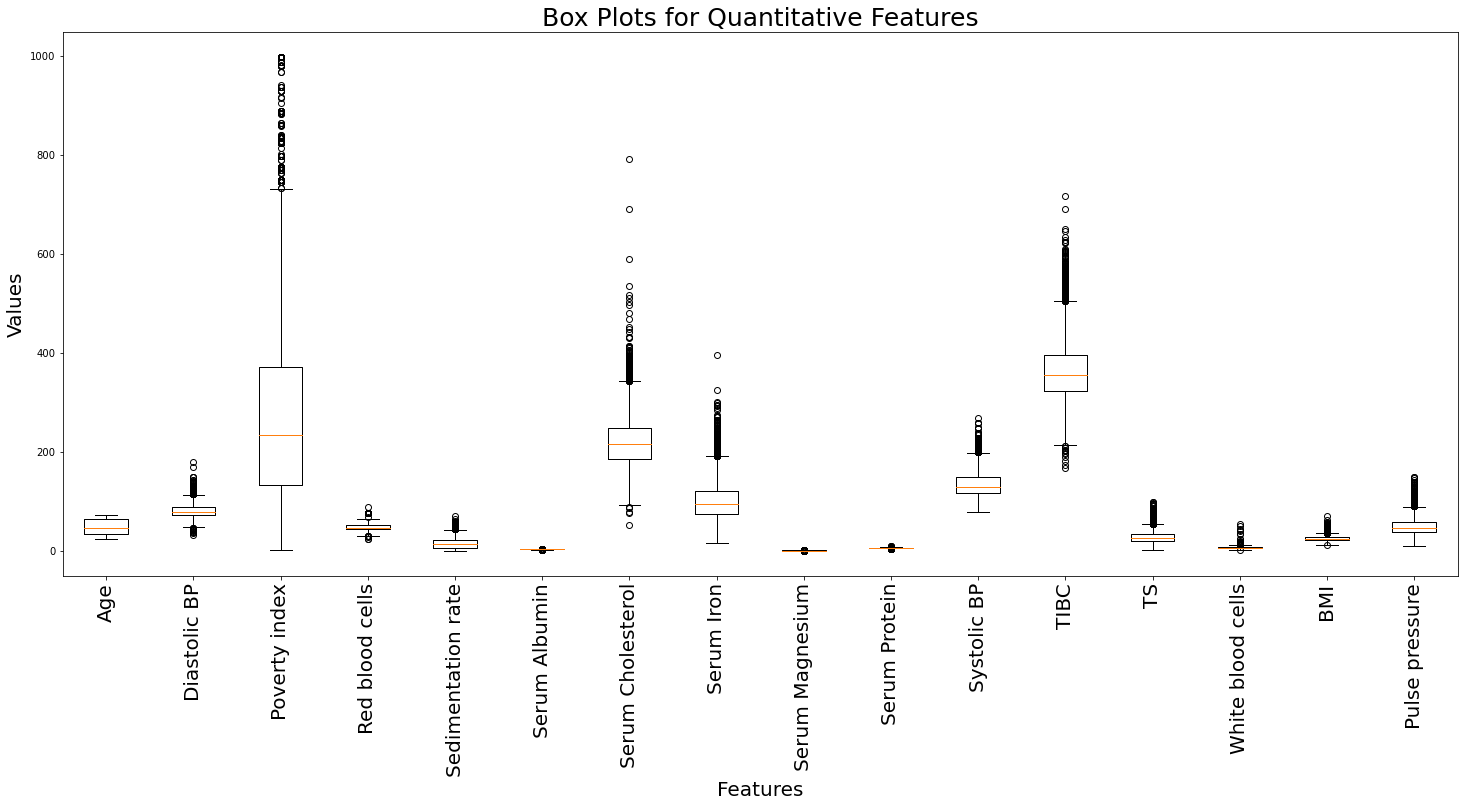

In [2]:
# Plotting box plots for all features
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df[quantitative_features])
ax.set_xticklabels(quantitative_features, rotation='vertical', fontsize="20")
ax.set_xlabel("Features", fontsize="20")
ax.set_ylabel("Values", fontsize="20")
ax.set_title("Box Plots for Quantitative Features",  fontsize="25")


## Visualizing Outliers for each Feature using Box Plots


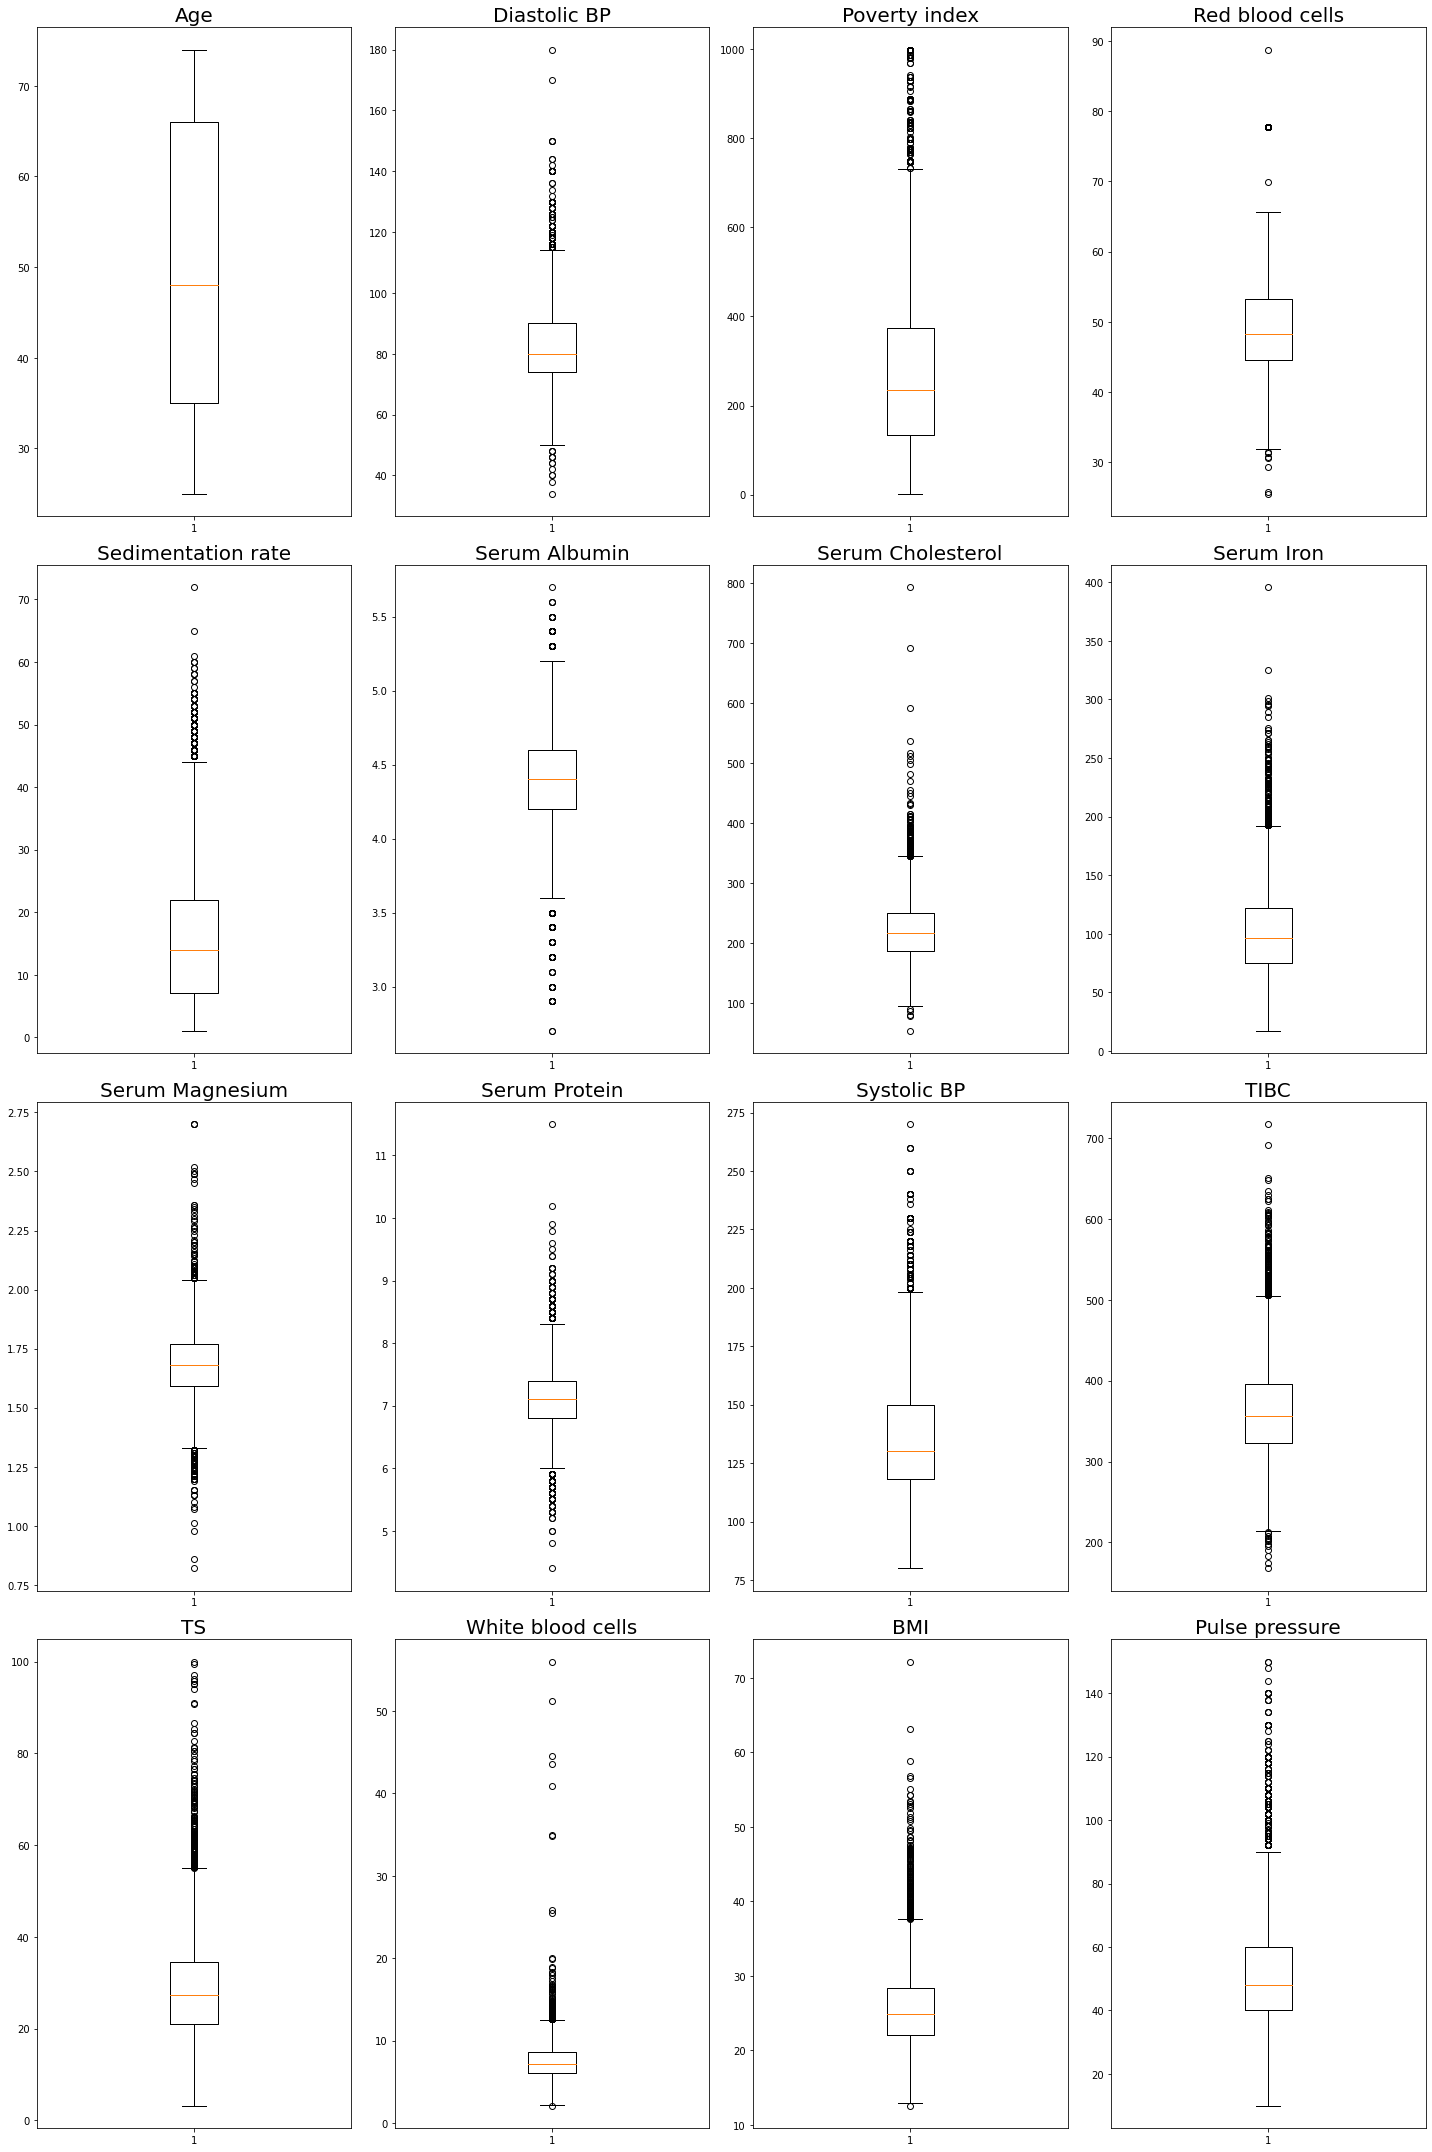

In [3]:
# Plotting box plot for each feature individually

# Creating the grid (We will use this grid later on)
NUM_ROWS = 4
NUM_COLS = 4

# Create the subplots
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(20, 30))

# Iterate over the features and create a subplot for each feature
for i, feature in enumerate(quantitative_features):
    # Calculate the subplot position
    row = i // NUM_ROWS
    col = i % NUM_COLS
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature, fontsize="20")

# Adjust the spacing between subplots
fig.tight_layout()


Since we have identified numerous outliers, it is not advisable to simply discard them without careful consideration. Outliers can often be the most intriguing data points within the entire dataset. Therefore, it is crucial to determine whether these outliers are the result of incorrect data entries (non-logical values) that can be safely eliminated, or if they actually represent rare events that warrant further attention.


## Summary Statistics


In [4]:
# Let's get summary statistics about our dataset with the outliers
df.describe()


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,death
count,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.00000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000
mean,49.273692,83.137195,290.015037,1.192563,51.962268,16.024362,4.36805,221.529176,101.247931,1.682035,7.107192,1.611143,134.444224,363.074135,28.540553,7.455251,25.661214,51.307029,0.382912
std,15.896873,13.265548,223.057351,0.423693,11.815828,11.450431,0.33229,49.752230,37.233160,0.145074,0.507228,0.487519,24.860497,58.712427,11.178432,2.297578,5.151157,18.211419,0.486125
min,25.000000,34.000000,2.000000,1.000000,25.500000,1.000000,2.70000,53.000000,17.000000,0.820000,4.400000,1.000000,80.000000,168.000000,3.200000,2.100000,12.585333,10.000000,0.000000
25%,35.000000,74.000000,134.000000,1.000000,44.600000,7.000000,4.20000,187.000000,75.000000,1.590000,6.800000,1.000000,118.000000,323.000000,21.050000,6.000000,22.094772,40.000000,0.000000
50%,48.000000,80.000000,235.000000,1.000000,48.200000,14.000000,4.40000,217.000000,96.000000,1.680000,7.100000,2.000000,130.000000,356.000000,27.200000,7.200000,24.920509,48.000000,0.000000
75%,66.000000,90.000000,373.000000,1.000000,53.200000,22.000000,4.60000,250.000000,122.000000,1.770000,7.400000,2.000000,150.000000,396.000000,34.600000,8.600000,28.337017,60.000000,1.000000
max,74.000000,180.000000,999.000000,3.000000,88.800000,72.000000,5.70000,793.000000,396.000000,2.700000,11.500000,2.000000,270.000000,717.000000,100.000000,56.000000,72.218113,150.000000,1.000000


## Dealing with Outliers using IQR Method


The IQR (Interquartile Range) method is a statistical technique used for identifying and handling outliers in a dataset. It is based on the concept of quartiles, which divide a dataset into four equal parts.
To apply this method, we follow the following steps:

1.  Calculate the first quartile ($Q1$) and the third quartile ($Q3$) of the dataset. The first quartile represents the 25th percentile, while the third quartile represents the 75th percentile.
2.  Calculate the interquartile range ($IQR$) by subtracting $Q1$ from $Q3$: $IQR = Q3 - Q1$.
3.  Define the lower threshold (L) and upper threshold (U) for outliers using the following formulas:
    - Lower threshold: $L = Q1 - k * IQR$
    - Upper threshold: $U = Q3 + k * IQR$
    - The value of "$k$" is a parameter that determines the sensitivity of the method. Commonly used values are 1.5 and 3, but it can be adjusted based on the specific requirements of the analysis.
4.  Identify outliers by considering any data point that falls below the lower threshold ($L$) or above the upper threshold ($U$).
5.  Decide on the appropriate action for handling the outliers based on the specific context and objectives of the analysis. Common options include:
    - Removal: Outliers can be removed from the dataset.
    - Capping: Outliers can be capped or replaced with the nearest non-outlying values.
    - Transformation: Outliers can be transformed using mathematical functions to reduce their impact.


In [5]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile and the third quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    # Calculating the thrshold
    threshold = 1.5 * iqr
    # Defining the lower and upper bounds
    lower_bound = q1 - threshold
    upper_bound = q3 + threshold
    # Filtering and returning the filtered data
    filtered_data = data[(data[column] >= lower_bound) &
                         (data[column] <= upper_bound)]
    return filtered_data


# Let's apply our previous method and save the new filtered data
for q in df[quantitative_features]:
    df = remove_outliers_iqr(df, q)

# Taking a look at our filtered data
df


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,death
545,47.0,80.0,25.0,2.0,48.0,30.0,4.4,228.0,70.0,1.56,8.0,2.0,120.0,466.0,15.0,8.1,31.797495,40.0,1.0
547,57.0,82.0,129.0,2.0,43.3,22.0,4.4,249.0,95.0,1.55,7.7,2.0,150.0,362.0,26.2,6.1,33.373154,68.0,1.0
548,74.0,80.0,63.0,2.0,47.3,8.0,4.4,141.1,131.0,1.81,7.5,1.0,142.0,315.0,41.6,3.8,27.259976,62.0,0.0
550,39.0,90.0,258.0,2.0,46.9,4.0,4.4,217.0,102.0,1.80,7.0,2.0,120.0,401.0,25.4,6.1,27.850838,30.0,0.0
552,42.0,75.0,258.0,1.0,41.1,18.0,5.0,211.0,111.0,1.69,6.8,2.0,115.0,468.0,23.7,6.0,26.666944,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,29.0,74.0,351.0,1.0,50.9,18.0,4.5,201.1,29.0,1.61,7.9,2.0,114.0,369.0,7.9,6.7,25.823936,40.0,0.0
8574,26.0,76.0,491.0,1.0,46.6,9.0,4.7,137.0,90.0,1.39,7.4,1.0,104.0,316.0,28.5,10.7,21.468805,28.0,1.0
8575,69.0,82.0,316.0,1.0,48.0,18.0,4.7,301.0,98.0,2.02,6.7,2.0,130.0,334.0,29.3,7.1,23.090226,48.0,0.0
8576,34.0,80.0,187.0,1.0,47.3,10.0,4.5,161.0,95.0,1.54,6.9,2.0,110.0,381.0,24.9,5.4,25.797680,30.0,0.0


## Visualization after applying IQR Method


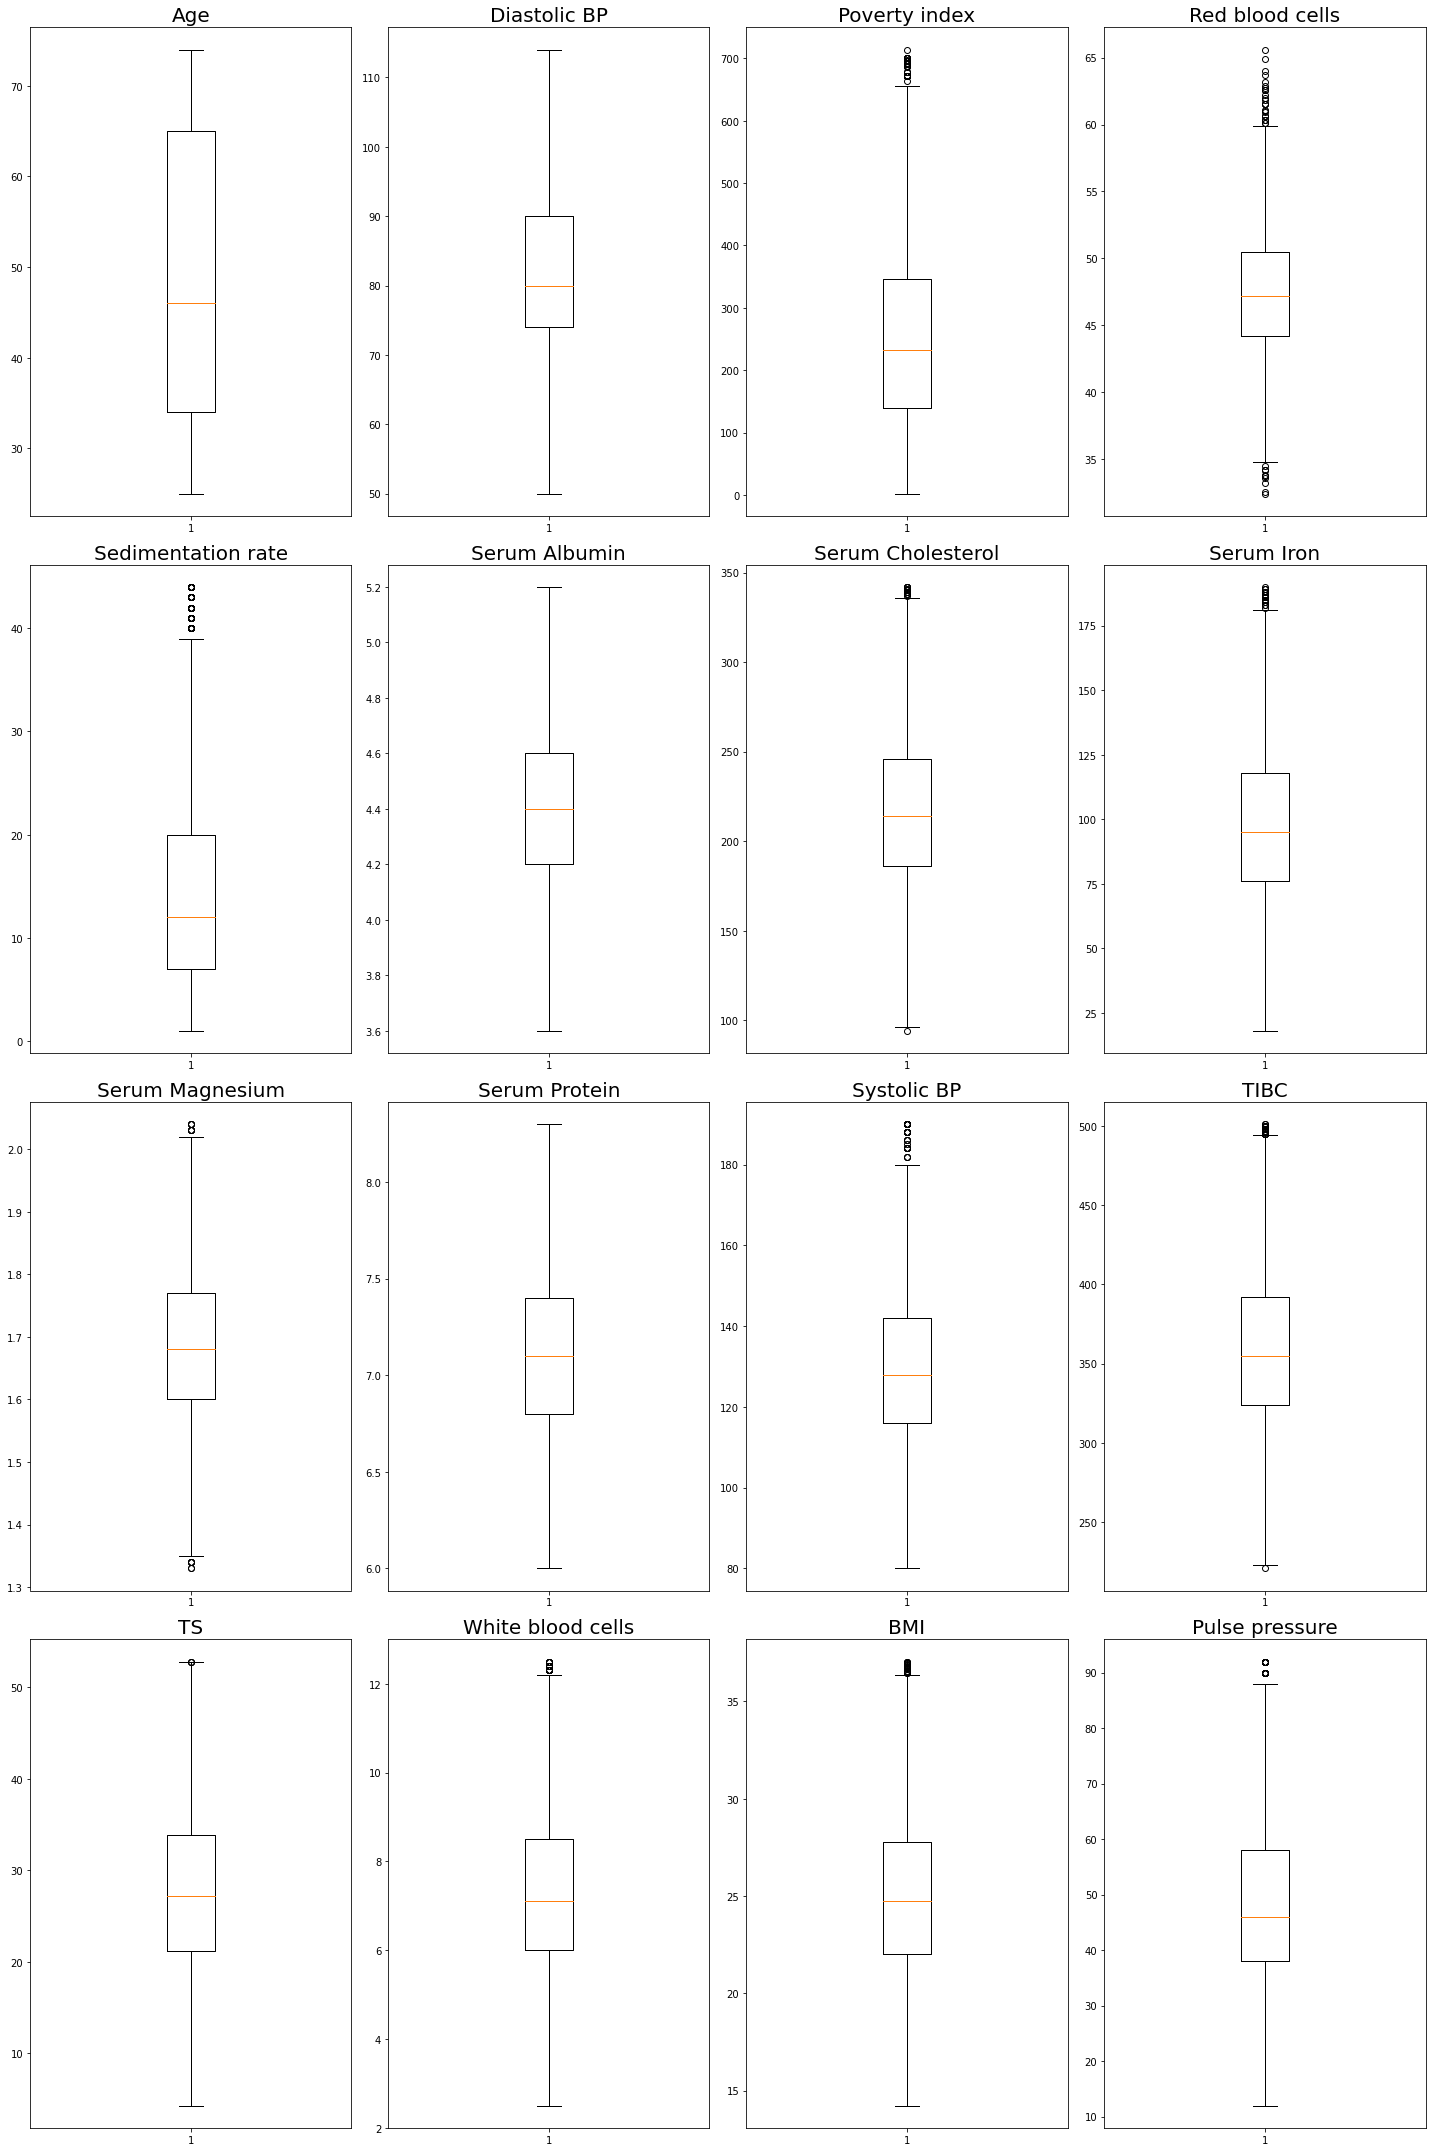

In [6]:
# Plotting box plot for each feature individually after applying the IQR method

# Create the subplots
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(20, 30))

# Iterate over the features and create subplots
for i, feature in enumerate(quantitative_features):
    # Calculate the subplot position
    row = i // NUM_ROWS
    col = i % NUM_COLS
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(feature, fontsize="20")

# Adjust the spacing between subplots
fig.tight_layout()


In [7]:
%store df NUM_ROWS NUM_COLS

Stored 'df' (DataFrame)
Stored 'NUM_ROWS' (int)
Stored 'NUM_COLS' (int)
